In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from datetime import date
from models.assets import (
    Job,
    Stream,
    Asset,
    Stock,
    RealEstateProperty,
    CommodityBundle,
    Saving,
    Loan,
)
from models.timeseries import (
    Timeseries,
    constant_increase_timeseries,
    constant_timeseries,
    months_in_interval,
)
from models.world import City, Commodity, Country, Currency


In [4]:
"""stock value is a timeseries in g Au that depend on the stock country currency.

Testing one year of data with all values constant"""
start = date(2024, 1, 1)
end = date(2024, 12, 31)
euro = Currency(
    name="EUR",
    interest_rate=constant_timeseries(0.03, start, end),
    units_per_g_Au=constant_timeseries(10, start, end),
)
Germany = Country(
    name="DE",
    currency=euro,
    real_estate_acquisition_cost_percentage=9,
    stock_index=constant_increase_timeseries(
        first_value=3, monthly_increase_rate=0.012, start=start, end=end
    ),
)

stock = Stock(
    initial_value=100,
    purchase_date=start,
    sale_date=end,
    country=Germany,
    currency=euro,
)

stock_value = stock.value_g_Au

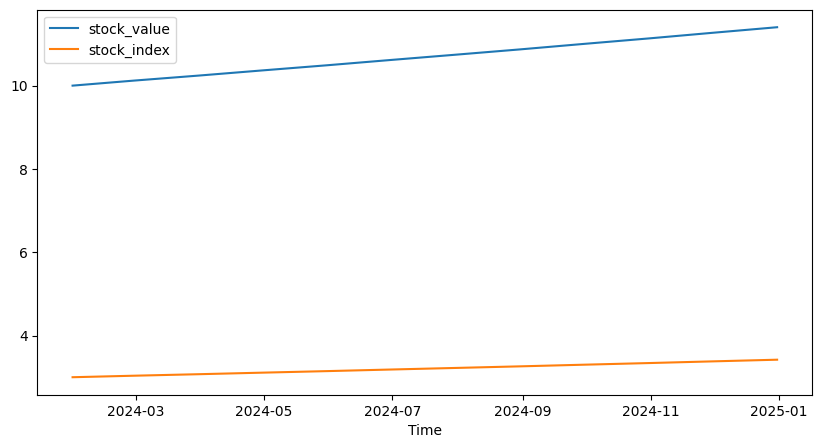

In [5]:
from view.timeseries_view import visualize_timeseries


visualize_timeseries({
    # "stock_value": stock_value,
    "stock_index": stock.country.stock_index
})